# Project Corrections

**This notebook contains a corrected version of the Classifiction Project**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score

import warnings
warnings.filterwarnings("ignore")

from acquire import get_telco_data
from prepare import prep_telco_data_explore
from prepare import prep_telco_data_model

<div class="alert alert-block alert-success"></div>

# Step #1. Plan:

**Goal:**
- Business objective:
  1. Identify top 3 drivers of churn
  2. Create model to predict curn w/customer data
    
- Project objective: 
  1. Predict with >73% accuracy whether a customer will churn.

- Deliverable: 
  1. Deliver a model with the estimated accuracy score.

- Hypotheses:
  1. Are those with fiber optic service more likely to churn?

  1. Are those utilizing tech support less likely to churn? 

<div class="alert alert-block alert-success"></div>

# Step #2. Acquire
**Run through basic data overview**
- .shape
- .head()
- .describe()
- .info()
- .isnull().sum()

In [2]:
# Create dataframe from csv

df = get_telco_data(cached = True)

In [3]:
# .shape() gives a basic shape of the data

df.shape

(7043, 27)

In [4]:
# . head() early visulization to see dataframe layout

df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id,contract_type,internet_service_type_id,internet_service_type,payment_type_id,payment_type
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,2,59.9,542.4,No,1,Month-to-month,1,DSL,2,Mailed check
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,4,69.4,571.45,No,1,Month-to-month,1,DSL,4,Credit card (automatic)
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,1,48.2,340.35,No,1,Month-to-month,1,DSL,1,Electronic check
3,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,No,...,1,25.1,25.1,Yes,1,Month-to-month,1,DSL,1,Electronic check
4,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,1,Yes,...,3,30.5,30.5,Yes,1,Month-to-month,1,DSL,3,Bank transfer (automatic)


In [5]:
# .describe() gives discriptive staistics of numeric variables

df.describe()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,contract_type_id,internet_service_type_id,payment_type_id
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,1.872923,1.690473,2.315633,64.761692,1.690473,1.872923,2.315633
std,0.368612,24.559481,0.737796,0.833755,1.148907,30.090047,0.833755,0.737796,1.148907
min,0.000000,0.000000,1.000000,1.000000,1.000000,18.250000,1.000000,1.000000,1.000000
25%,0.000000,9.000000,1.000000,1.000000,1.000000,35.500000,1.000000,1.000000,1.000000
50%,0.000000,29.000000,2.000000,1.000000,2.000000,70.350000,1.000000,2.000000,2.000000
75%,0.000000,55.000000,2.000000,2.000000,3.000000,89.850000,2.000000,2.000000,3.000000
max,1.000000,72.000000,3.000000,3.000000,4.000000,118.750000,3.000000,3.000000,4.000000


In [6]:
# .info() identifies the data type and null value count for each variable

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [7]:
# .isnull().sum() provides the number of null values, if any exists

df.isnull().sum()

customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
internet_service_type_id    0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
contract_type_id            0
paperless_billing           0
payment_type_id             0
monthly_charges             0
total_charges               0
churn                       0
contract_type_id            0
contract_type               0
internet_service_type_id    0
internet_service_type       0
payment_type_id             0
payment_type                0
dtype: int64

<div class="alert alert-block alert-success"></div>

# Step #3. Prepare

1. **Returns data frame  modified for exploration**


2. **Run the same tests, to make sure it is ready**
    - .shape
    - .head()
    - .describe()
    - .info()
    - .isnull().sum()
    
    
3. **Split in to to train/validate/test**

In [8]:
# Import modified dataframe 

df = prep_telco_data_explore(get_telco_data(cached = True))

In [9]:
# .shape() gives a basic shape of the data

df.shape

(7043, 44)

In [10]:
# . head() early visulization to see dataframe layout

df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,mail_check,month_to_month_contract,one_year_contract,two_year_contract,internet_service_type_cc,internet_service,dsl,fiber_optic,None,tenure_years
0,0003-MKNFE,Male,0,0,0,9,1,Yes,No,No,...,1,1,0,0,0,1,1,0,0,0.75
1,0013-MHZWF,Female,0,0,1,9,1,No,No,No,...,0,1,0,0,0,1,1,0,0,0.75
2,0015-UOCOJ,Female,1,0,0,7,1,No,Yes,No,...,0,1,0,0,0,1,1,0,0,0.58
3,0023-HGHWL,Male,1,0,0,1,0,No phone service,No,No,...,0,1,0,0,0,1,1,0,0,0.08
4,0032-PGELS,Female,0,1,1,1,0,No phone service,Yes,No,...,0,1,0,0,0,1,1,0,0,0.08


In [11]:
# .describe() gives discriptive staistics of numeric variables

df.describe()

,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,churn,gender_cc,...,mail_check,month_to_month_contract,one_year_contract,two_year_contract,internet_service_type_cc,internet_service,dsl,fiber_optic,None,tenure_years
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2279.734304,0.265370,0.504756,...,0.228880,0.550192,0.209144,0.240664,0.872923,0.783331,0.343746,0.439585,0.216669,2.697402
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.794470,0.441561,0.500013,...,0.420141,0.497510,0.406726,0.427517,0.737796,0.412004,0.474991,0.496372,0.412004,2.046968
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,398.550000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.750000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.420000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.580000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,6.000000


In [12]:
# .info() identifies the data type and null value count for each variable

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   int64  
 4   dependents                7043 non-null   int64  
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   int64  
 7   multiple_lines            7043 non-null   object 
 8   online_security           7043 non-null   object 
 9   online_backup             7043 non-null   object 
 10  device_protection         7043 non-null   object 
 11  tech_support              7043 non-null   object 
 12  streaming_tv              7043 non-null   object 
 13  streaming_movies          7043 non-null   object 
 14  paperles

In [13]:
# .isnull().sum() provides the number of null values, if any exists

df.isnull().sum()

customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
internet_service_type       0
payment_type                0
gender_cc                   0
payment_type_cc             0
multiple_lines_cc           0
online_security_cc          0
online_backup_cc            0
device_protection_cc        0
tech_support_cc             0
streaming_tv_cc             0
streaming_movies_cc         0
contract_type_cc            0
bank_transfer_auto          0
credit_card_auto            0
e_check   

In [14]:
# Data looks good, so we will not split in to train/validate/test for exploration, stratify on our target variable

train_validate, test = train_test_split(df, test_size=.15, random_state=123, stratify = df.churn)
train, validate = train_test_split(train_validate, test_size=.15, random_state=123, stratify = train_validate.churn)

print('train', train.shape)
print('test', test.shape)
print('validate', validate.shape)

train (5088, 44)
test (1057, 44)
validate (898, 44)


<div class="alert alert-block alert-success"></div>

# Step #4. Data Exploration

- Visualize attributes & interactions (Python: matplotlib).


- Analyze: statistically and more generally (Python: statsmodels, numpy, scipy, scikit-learn).


In [15]:
# estabolish basline model accuracy

train.churn.value_counts(normalize = True)

0    0.734473
1    0.265527
Name: churn, dtype: float64

**Baseline is 73%, this is the number we are looking to beat in your model**

**I am going to use 1 as my positive condition (Churn) and 0 as my negative condition (No-Churn)**

### Initial Visulizations:

- Check to see that my basic assumptions hold weight before hypothesis testing

In [16]:
# reference line for my graphs
churn_rate = train.churn.mean()

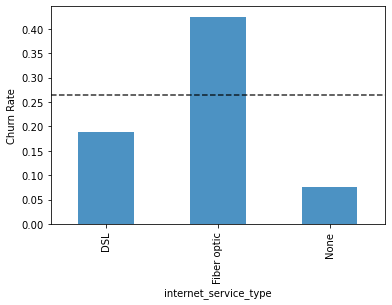

In [17]:
# graph hist of values
train.groupby('internet_service_type').churn.mean().plot.bar(alpha=.8)
plt.ylabel('Churn Rate')
plt.hlines(churn_rate, *plt.xlim(), ls='--', alpha=.8)

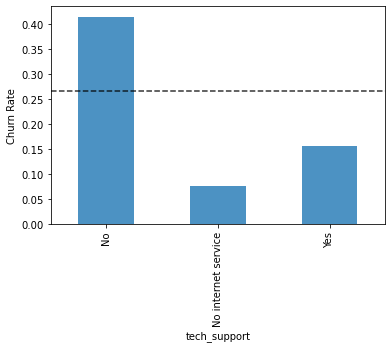

In [18]:
# graph hist of values
train.groupby('tech_support').churn.mean().plot.bar(alpha=.8)
plt.ylabel('Churn Rate')
plt.hlines(churn_rate, *plt.xlim(), ls='--', alpha=.8)

### Observations:

- According to the data visualization it appears that customers with fiber optic service are more likely to churn


- According to the data visulaization it appears that customers without tech support are more likley to churn

**Now it is time to use statistical testing to quantifiy the strength of these relationships**

## Statistical Testing


### Hypothesis Test One: Chi Squared Test For Independence

- **Churn is dependent on fiber optic service**

Null Hypothesis: $H_{0}$: Whether a person churns is independent of fiber optic service

Alternative Hypothesis: $H_{a}$: Whether a person churns is not independent of fiber optic service


In [19]:
# 1. Set alpha, how confident you want to be in the relationship between your variables

confidence_level = .99
alpha = round(1 - confidence_level,2)
alpha



# 2. Sort data frame and remove "None" from internet_service_type

dsl_fiber = df.internet_service_type != 'None'
df_dsl_fiber = df[dsl_fiber]



# 3. Create a crosstab to aggregate data

ctab = pd.crosstab(df_dsl_fiber.churn, df_dsl_fiber.internet_service_type)
ctab



# 4. Preform Statistical Test, return P-value

Chi2, p, degf, expected = stats.chi2_contingency(ctab)
print(f'Our p-value is {p}.')
print(f'Our p-value is less than our alpha: {p < alpha}')

Our p-value is 2.2962170975696955e-73.
Our p-value is less than our alpha: True


**Findings:**

P-value is less than alpha so we reject the null hypothesis, ie. Our x^2 test informs us that the two categories, churn and fiber optic service are not independent.

### Hypothesis Test Two: Chi Squared Test For Independence

- **Churn is dependent on tech support**

Null Hypothesis: $H_{0}$: Whether a person churns is independent of tech support

Alternative Hypothesis: $H_{a}$: Whether a person churns is not independent of tech support

In [20]:
# 1. Set alpha, how confident you want to be in the relationship between your variables

confidence_level = .99
alpha = round(1 - confidence_level,2)
alpha



# 2. Sort data frame and remove "None" from internet_service_type

df_support = df.tech_support != 'No internet service'
df_support_final = df[df_support]



# 3. Create a crosstab to aggregate data

ctab = pd.crosstab(df_support_final.churn, df_support_final.tech_support)
ctab



# 4. Preform Statistical Test, return P-value

Chi2, p, degf, expected = stats.chi2_contingency(ctab)
print(f'Our p-value is {p}.')
print(f'Our p-value is less than our alpha: {p < alpha}')

Our p-value is 4.35191667899426e-92.
Our p-value is less than our alpha: True


**Findings:**

P-value is less than alpha so we reject the null hypothesis, ie. Our x^2 test informs us that the two categories, churn and tech supoort are not independent.

## Exploring more variables that correlate to churn

In [21]:
# Just looking for correlations

df.corr().iloc[8]

senior_citizen              0.150889
partner                    -0.150448
dependents                 -0.164221
tenure                     -0.352229
phone_service               0.011942
paperless_billing           0.191825
monthly_charges             0.193356
total_charges              -0.198324
churn                       1.000000
gender_cc                  -0.008612
payment_type_cc             0.107062
multiple_lines_cc           0.038037
online_security_cc         -0.289309
online_backup_cc           -0.195525
device_protection_cc       -0.178134
tech_support_cc            -0.282492
streaming_tv_cc            -0.036581
streaming_movies_cc        -0.038492
contract_type_cc           -0.396713
bank_transfer_auto         -0.117937
credit_card_auto           -0.134302
e_check                     0.301919
mail_check                 -0.091683
month_to_month_contract     0.405103
one_year_contract          -0.177820
two_year_contract          -0.302253
internet_service_type_cc   -0.047291
i

**Looking at these values I am going to build a balanced model that uses the top 5 positive and top 5 negative drivers of churn**

   - month_to_month_contract
   - e_check
   - fiber_optic
   - internet_service
   - monthly_charges
   - tenure_years
   - dependents
   - tech_support
   - no_internet
   
**Need a model that is optimized for accuracy and recall**
   - High recall reduces type II errors (predict no churn, and actually churn)

<div class="alert alert-block alert-success"></div>

# Step #5. Modeling

**Creating 4 Models to run on train dataset**
1. Logistic Regression
1. Decision Tree
1. Random Forrest
1. KNN

In [22]:
# variable called None (for no internet) must be converted to a different name.  Just noticed 

In [23]:
def scale(train, validate, test):
    scaler = MinMaxScaler()
    train[['tenure', 'monthly_charges', 'total_charges','tenure_years']] = scaler.fit_transform(train[['tenure', 'monthly_charges', 'total_charges','tenure_years']])
    validate[['tenure', 'monthly_charges', 'total_charges','tenure_years']] = scaler.transform(validate[['tenure', 'monthly_charges', 'total_charges','tenure_years']])
    test[['tenure', 'monthly_charges', 'total_charges','tenure_years']]= scaler.transform(test[['tenure', 'monthly_charges', 'total_charges','tenure_years']])
    return train, validate, test

## Train

### Logistic Regression

In [24]:
# Logistic Model
X_train_1 = train[['month_to_month_contract','fiber_optic','senior_citizen','internet_service','paperless_billing', 'monthly_charges', 'e_check','tenure','online_security_cc','tech_support_cc','one_year_contract','two_year_contract','tenure_years','total_charges','None']]
y_train = train.churn

# Log Function
log = LogisticRegression(C=1, random_state = 123, solver='lbfgs')
log.fit(X_train_1, y_train)

# make a prediction with traning data
y_pred_1 = log.predict(X_train_1)
# estimate prob of churn with training data
y_pred_proba_1 = log.predict_proba(X_train_1)

print('Accuracy of Logistic Classifier on training set: {:.2f}'
     .format(log.score(X_train_1, y_train)))
print(classification_report(y_train, y_pred_1))


Accuracy of Logistic Classifier on training set: 0.80
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3737
           1       0.66      0.54      0.59      1351

    accuracy                           0.80      5088
   macro avg       0.75      0.72      0.73      5088
weighted avg       0.80      0.80      0.80      5088



In [25]:
# Print coefficents and intercepts to examine how the variables affected eachother in the algorithm

print('Coefficient: \n', log.coef_)
print('Intercept: \n', log.intercept_)

Coefficient: 
 [[ 2.47779172e-01  6.48740527e-01  2.56539349e-01 -5.57113342e-02
   3.82696861e-01  8.23638949e-04  5.29309038e-01 -6.01399267e-02
  -1.91853544e-01 -2.41103441e-01 -2.57936856e-01 -6.41209438e-01
  -9.24448255e-03  3.45199900e-04 -5.95655788e-01]]
Intercept: 
 [-0.6557804]


**Findings**

**Balanced Model:(5+ and 5-) = Accuracy of 80% and Recall of 51%**

**Only + Drivers = Accuracy of 77% and Recall of 47%**

**Only - Drivers = Accuracy of 78% and Recall of 50%**

**All Drivers Combined = Accuracy of 80% and Recall of 51%**

**Coeificents in model that were less then 10% were removed(partner, dependents, online backup, device protection)**

### Decision Tree

In [26]:
# Decision Tree Model
X_train_2 = train[['month_to_month_contract','fiber_optic','senior_citizen','internet_service','paperless_billing', 'monthly_charges', 'e_check','tenure','online_security_cc','tech_support_cc','one_year_contract','two_year_contract','tenure_years','total_charges','None']]
y_train = train.churn

# Decision Tree Function
clf = DecisionTreeClassifier(max_depth=10, random_state=123)
clf.fit(X_train_2, y_train)

#make a prediction with traning data
y_pred_2 = clf.predict(X_train_2)
#estimate prob of churn with training data
y_pred_proba_2 = clf.predict_proba(X_train_2)

print('Accuracy of Logistic Classifier on training set: {:.2f}'
     .format(clf.score(X_train_2, y_train)))
print(classification_report(y_train, y_pred_2))

Accuracy of Logistic Classifier on training set: 0.87
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      3737
           1       0.79      0.72      0.75      1351

    accuracy                           0.87      5088
   macro avg       0.84      0.82      0.83      5088
weighted avg       0.87      0.87      0.87      5088



### Random Forrest

In [27]:
# Random Forrest Model
X_train_3 = train[['month_to_month_contract','fiber_optic','senior_citizen','internet_service','paperless_billing', 'monthly_charges', 'e_check','tenure','online_security_cc','tech_support_cc','one_year_contract','two_year_contract','tenure_years','total_charges','None']]
y_train = train.churn

# Random Forrest Function
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=10,
                            n_estimators=100,
                            max_depth=20, 
                            random_state=123)

rf.fit(X_train_3, y_train)

#make a prediction with traning data
y_pred_3 = rf.predict(X_train_3)
#estimate prob of churn with training data
y_pred_proba_3 = rf.predict_proba(X_train_3)

print('Accuracy of Logistic Classifier on training set: {:.2f}'
     .format(rf.score(X_train_3, y_train)))
print(classification_report(y_train, y_pred_3))

Accuracy of Logistic Classifier on training set: 0.83
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      3737
           1       0.73      0.57      0.64      1351

    accuracy                           0.83      5088
   macro avg       0.79      0.75      0.76      5088
weighted avg       0.82      0.83      0.82      5088



### KNN

In [28]:
# KNN Model
X_train_4 = train[['month_to_month_contract','fiber_optic','senior_citizen','internet_service','paperless_billing', 'monthly_charges', 'e_check','tenure','online_security_cc','tech_support_cc','one_year_contract','two_year_contract','tenure_years','total_charges','None']]
y_train = train.churn

# Random Forrest Function
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

knn.fit(X_train_4, y_train)

#make a prediction with traning data
y_pred_4 = knn.predict(X_train_4)
#estimate prob of churn with training data
y_pred_proba_4 = knn.predict_proba(X_train_4)

print('Accuracy of Logistic Classifier on training set: {:.2f}'
     .format(knn.score(X_train_4, y_train)))
print(classification_report(y_train, y_pred_4))

Accuracy of Logistic Classifier on training set: 0.83
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      3737
           1       0.73      0.56      0.63      1351

    accuracy                           0.83      5088
   macro avg       0.79      0.74      0.76      5088
weighted avg       0.82      0.83      0.82      5088



## Validate
**(Top 3 Models)**
- I chose to validate using the logistic, decision tree, and knn models because they provided me with the greatest overall values in accuracy and recal

In [29]:
# Train models on validate

X_validate_1 = validate[['month_to_month_contract','fiber_optic','senior_citizen','internet_service','paperless_billing', 'monthly_charges', 'e_check','tenure','online_security_cc','tech_support_cc','one_year_contract','two_year_contract','tenure_years','total_charges','None']]
X_validate_2 = validate[['month_to_month_contract','fiber_optic','senior_citizen','internet_service','paperless_billing', 'monthly_charges', 'e_check','tenure','online_security_cc','tech_support_cc','one_year_contract','two_year_contract','tenure_years','total_charges','None']]
X_validate_4 = validate[['month_to_month_contract','fiber_optic','senior_citizen','internet_service','paperless_billing', 'monthly_charges', 'e_check','tenure','online_security_cc','tech_support_cc','one_year_contract','two_year_contract','tenure_years','total_charges','None']]
y_validate = validate.churn

#make a prediction with validate data
y_pred_1 = log.predict(X_validate_1)
y_pred_2 = clf.predict(X_validate_2)
y_pred_4 = knn.predict(X_validate_4)

#estimate prob of churn with training data
y_pred_proba_1 = log.predict_proba(X_validate_1)
y_pred_proba_2 = clf.predict_proba(X_validate_2)
y_pred_proba_4 = knn.predict_proba(X_validate_4)

In [30]:
# Logistic Model Preformance
print('Accuracy of Logistic Classifier on validate set: {:.2f}'
     .format(log.score(X_validate_1, y_validate)))
print(classification_report(y_validate, y_pred_1))

Accuracy of Logistic Classifier on validate set: 0.80
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       660
           1       0.65      0.51      0.57       238

    accuracy                           0.80       898
   macro avg       0.74      0.71      0.72       898
weighted avg       0.79      0.80      0.79       898



In [31]:
# Decision Tree Preformance
print('Accuracy of Decision Tree Classifier on validate set: {:.2f}'
     .format(clf.score(X_validate_2, y_validate)))
print(classification_report(y_validate, y_pred_2))

Accuracy of Decision Tree Classifier on validate set: 0.76
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       660
           1       0.56      0.50      0.53       238

    accuracy                           0.76       898
   macro avg       0.69      0.68      0.68       898
weighted avg       0.75      0.76      0.76       898



In [32]:
# KNN Preformance
print('Accuracy of KNN Classifier on validate set: {:.2f}'
     .format(knn.score(X_validate_4, y_validate)))
print(classification_report(y_validate, y_pred_4))

Accuracy of KNN Classifier on validate set: 0.79
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       660
           1       0.62      0.50      0.56       238

    accuracy                           0.79       898
   macro avg       0.73      0.70      0.71       898
weighted avg       0.78      0.79      0.78       898



**Findings:**
- Logistic model had best overall accuray and recall (52%) on validate data. Will use logistic model on test data

## Test: (Top Model)

In [33]:
# Test Data
X_test = test[['month_to_month_contract','fiber_optic','senior_citizen','internet_service','paperless_billing', 'monthly_charges', 'e_check','tenure','online_security_cc','tech_support_cc','one_year_contract','two_year_contract','tenure_years','total_charges','None']]
y_test = test.churn


y_pred_test = log.predict(X_test)

print('Accuracy of Logistic Classifier on test set: {:.2f}'
     .format(log.score(X_test, y_test)))

Accuracy of Logistic Classifier on test set: 0.79


In [34]:
confusion = confusion_matrix(y_test, y_pred_test)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Classification Accuracy: Overall, how often is the classifier correct?

# use float to perform true division, not integer division
print("Classification Accuracy: Overall, how often is the classifier correct")
print((TP + TN) / float(TP + TN + FP + FN))

# Classification Error: Overall, how often is the classifier incorrect?

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print("Classification Error: Overall, how often is the classifier incorrect")
print(classification_error)

# Sensitivity: When the actual value is positive, how often is the prediction correct?

sensitivity = TP / float(FN + TP)
print("Sensitivity: When the actual value is positive, how often is the prediction correct")
print(sensitivity)

# Specificity: When the actual value is negative, how often is the prediction correct?

specificity = TN / (TN + FP)
print("Specificity: When the actual value is negative, how often is the prediction correct")
print(specificity)

# False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

false_positive_rate = FP / float(TN + FP)
print("False Positive Rate: When the actual value is negative, how often is the prediction incorrect")
print(false_positive_rate)

# Precision: When a positive value is predicted, how often is the prediction correct?

precision = TP / float(TP + FP)
print("Precision: When a positive value is predicted, how often is the prediction correct")
print(precision)

print(classification_report(y_test, y_pred_test))

[[687  90]
 [127 153]]
Classification Accuracy: Overall, how often is the classifier correct
0.7947019867549668
Classification Error: Overall, how often is the classifier incorrect
0.2052980132450331
Sensitivity: When the actual value is positive, how often is the prediction correct
0.5464285714285714
Specificity: When the actual value is negative, how often is the prediction correct
0.8841698841698842
False Positive Rate: When the actual value is negative, how often is the prediction incorrect
0.11583011583011583
Precision: When a positive value is predicted, how often is the prediction correct
0.6296296296296297
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       777
           1       0.63      0.55      0.59       280

    accuracy                           0.79      1057
   macro avg       0.74      0.72      0.72      1057
weighted avg       0.79      0.79      0.79      1057



In [35]:
# False negative rate (Predict No Churn/ Churn)
FNR = FN/(TP+FN)
FNR

0.45357142857142857

<div class="alert alert-block alert-success"></div>

# Step #6. Conclusion

## Summary

   - Identified 19 variables with >= 0.15 correlation to churn

   - Statiscial testing (Chi Squared Test of Independence) was preformed on two variables of interest
     internet_service_type and tech_support.

   - The null hypothosis of (independence) was rejected for each variable providing insight in to model building

   - Machine learning models were constructed integrating 15 variables that demonstarted the greatest correlation      to churn

   - Models were evaluated against a baseline accuracy of 73% and optimized for Recall.

   - Following testing and validation a logistic model was selected, and when run on unseen test data provided a 
     20% increase in overall accuracy with a Recall score of 55%.

   - This Recall score is not optimal because when the model makes costly type II errors 45% of the time.

## Recommendations



**Baseline Observation:** Churn is a problem, the top 3 drivers of churn at Telco include
       - month to month contracts
       - e checks
       - fiber optic internet service


**Recommendation One:** Increase outreach for tech support. The majority of customers who leave have internet     service, specifically fiber optic service. Literature suggests better customer service leads to a reduction in churn.


**Recommendation Two:** Have finance examine payment methods. Churn is high in customers who pay using e checks. Need more research on customer base, who they are and relationship between e-check and churn


**Recommendation Three:** Review month to month contracts. Churn rate is greater than 50% for first 8 months of service. Promotions or target marketing may create incentives to keep cutomer base

## Experimental Design Improvements / Questions for Further Exploration

1. **Next Steps:** A model with 10 values that only positivly correlated with churn may produce improved result

2. **Questions to explore:** Other positive customer interactions to collect and quantify (besides tech_support) to better understand relationship between churn and customer dissatisfcation



# Export predictions as csv

In [36]:
# # Create eval_df and rename the train survived column target.
# predict_churn_df = train[['churn']].rename(columns={'churn': 'target'}, inplace = True)

# # this cell creates the best model
# X_train = train[['month_to_month_contract','fiber_optic','senior_citizen','internet_service','paperless_billing', 'monthly_charges', 'e_check','tenure','online_security_cc','tech_support_cc','one_year_contract','two_year_contract','tenure_years','total_charges','None']]
# y_train = train.target

# log = LogisticRegression(C=1, random_state = 123, solver='lbfgs')
# log.fit(X_train, y_train)

# # call in a complete data frame to test

# X = df_explore[['month_to_month_contract','fiber_optic','senior_citizen','internet_service','paperless_billing', 'monthly_charges', 'e_check','tenure','online_security_cc','tech_support_cc','one_year_contract','two_year_contract','tenure_years','total_charges','None']]

# # model.predict(X) gives us predictions for the entire dataframe
# df_explore['prediction'] = log.predict(X)

# # Export to CVS file
# df_explore.to_csv('predictions.csv')